In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [2]:
# Loading the dataset
train_file_path = "C:/Users/ACER/train.csv"
dataset_df = pd.read_csv(train_file_path)

# Displaying the first few rows of the dataset
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop the 'Id' column as it's not needed for training
dataset_df = dataset_df.drop('Id', axis=1)

# Check the updated data structure
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

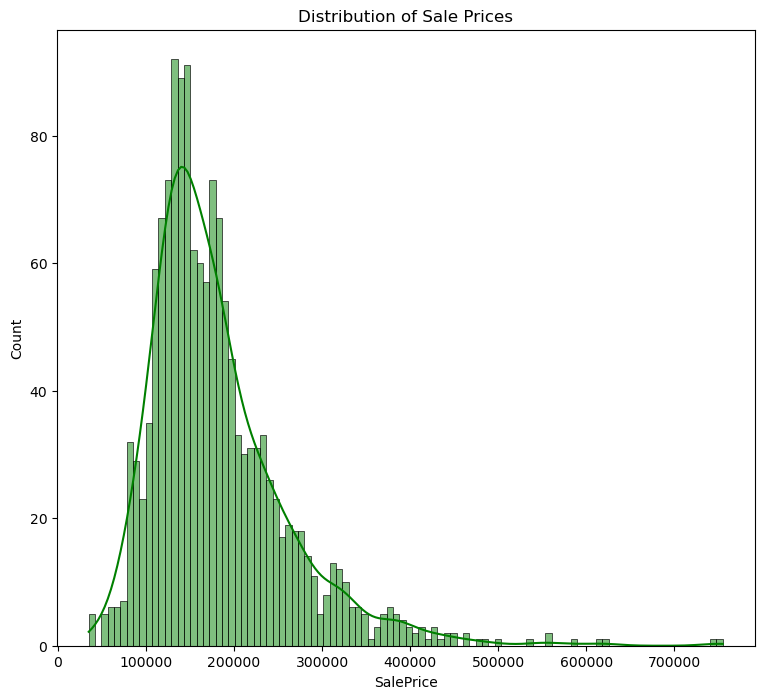

<Figure size 640x480 with 0 Axes>

In [4]:
# Plot the distribution of the Sale Price
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['SalePrice'], kde=True, color='g', bins=100)
plt.title('Distribution of Sale Prices')
plt.show()
plt.savefig("Distribution of sale price.jpg")

In [5]:
# Select only numeric columns for simplicity and drop rows with missing values
df_num = dataset_df.select_dtypes(include=['float64', 'int64']).dropna()

# Display the first few rows to check
df_num.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
# Split the data into features (X) and labels (y)
X = df_num.drop('SalePrice', axis=1)
y = df_num['SalePrice']

In [13]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Define the Decision Tree model
dt = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [17]:
# Predict on the validation set
y_pred = dt.predict(X_valid)

# Calculate evaluation metrics
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")


Evaluation Metrics:
Mean Squared Error (MSE): 1713719997.70
Mean Absolute Error (MAE): 27784.79
R-squared Score (R2): 0.79


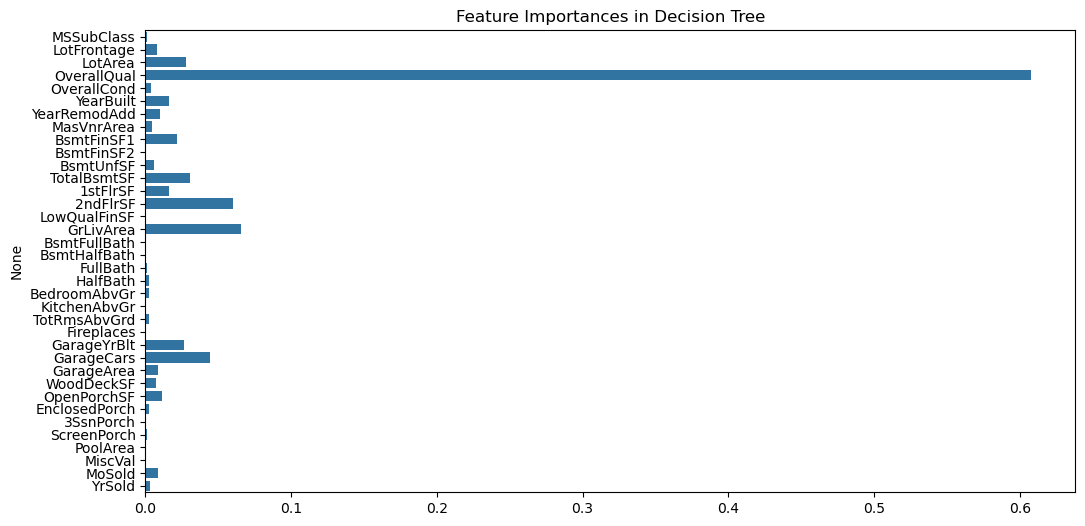

In [19]:
# Plot feature importances
plt.figure(figsize=(12, 6))
feature_importances = dt.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances in Decision Tree")
plt.show()


In [21]:
# Load the test dataset
test_file_path = "C:/Users/ACER/test.csv"
test_data = pd.read_csv(test_file_path)

# Save the Id column for the final output
test_ids = test_data['Id']

# Drop the 'Id' column and select only numeric columns
test_data = test_data.drop('Id', axis=1).select_dtypes(include=['float64', 'int64']).fillna(0)  # Fill missing values with 0

In [23]:
# Predict on the test data
test_preds = dt.predict(test_data)

# Create the output dataframe
output = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})

# Display the first few rows of the predictions
output.head()

,Id,SalePrice
0,1461,131593.750000
1,1462,166500.000000
2,1463,208900.000000
3,1464,199666.666667
4,1465,189000.000000


In [25]:
# Save predictions to a CSV file for submission
output.to_csv('C:/Users/ACER/submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv
